# Movie Classify with different model size

In [1]:
import keras 
keras.__version__

Using TensorFlow backend.


'2.0.8'

In [2]:
from keras.datasets import imdb
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index();

In [4]:
import numpy as np
def vectorized_sequences(sequences, dim=10000):
    # tạo ma trận 0 shape len(seq),dim
    results = np.zeros((len(sequences),dim))
    for i, sequence in enumerate(sequences):
        # đánh dấu index của result[i] sang 1
        # print(i, sequence)
        results[i, sequence] = 1
    return results

In [5]:
# Prepare data
x_train = vectorized_sequences(train_data)
x_test = vectorized_sequences(test_data)

y_train = np.asarray(train_labels, dtype='float32')
y_test = np.asarray(test_labels,dtype='float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
from keras import models, layers

In [7]:
# Build network
def build_network(no_unit):
    '''
    # Argument :
      no_unit : number of hidden unit in layer 1 & 2
    # Return : 
      network with 2 hidden layers, each layer has no_unit units
    '''
    model = models.Sequential();
    model.add(layers.Dense(no_unit,activation='relu',
                           input_shape=(10000,)))
    model.add(layers.Dense(no_unit,activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    # print(model.summary())
    return model    

In [8]:
list_model = []
list_model.append(build_network(4)) # small network
list_model.append(build_network(16)) # medium network
list_model.append(build_network(512)) # ex-large network

list_history = []

In [9]:
import time
for model in list_model:
    start_time = time.time()
    history = model.fit(partial_x_train,partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val),
                        verbose = 0)
    #print('complete train model after : ', (time.time()- start_time))
    
    list_history.append(history)

In [10]:
list_history[0].history.keys()

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])

In [11]:
import matplotlib.pyplot as plt
def plotter(metric_name):
    plt.clf()
    symbol_list = ['g-','r-','b-']
    i = 0
    for history in list_history:
        metric = history.history.get(metric_name)
        plt.plot(range(1, len(metric)+1), metric, symbol_list[i])
        i+=1
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.show()

In [12]:
%matplotlib inline

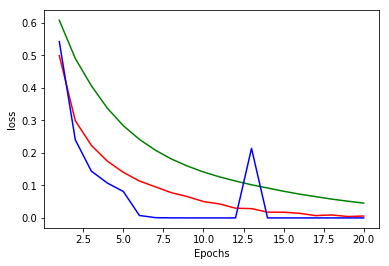

In [13]:
plotter('loss')

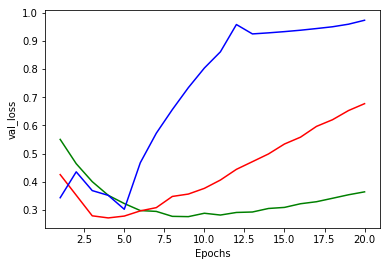

In [14]:
plotter('val_loss')

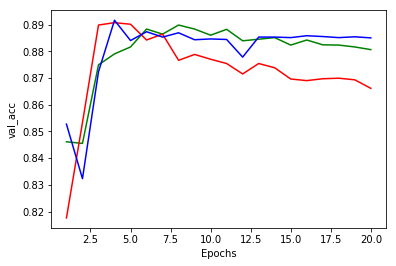

In [15]:
plotter('val_acc')

<span style="color:green">Model xanh lá (small model) </span> 

<span style="color:red">Model đỏ (medium model) </span> 

<span style="color:blue">Model xanh nước biển (ex-large model) </span> 

Nhận xét : 
- Nhìn trên val_loss, thứ tự các model over fit từ chậm đến nhanh : <span style="color:green">Model xanh lá (~11 epochs ) </span> , tiếp đến là <span style="color:red">Model đỏ (~5 epochs) </span> và <span style="color:blue">Model xanh nước biển (~ 2 epochs )</span> 
- Training_loss :<span style="color:blue">Model xanh nước biển </span> gần như có TL = 0 --> Từ training loss không thể khẳng định được độ chính xác của model
- Model càng lớn càng dễ minimize training loss, nhưng cũng càng sớm over-fitting

In [21]:
list_model = []
list_model.append(build_network(4)) # small network
list_model.append(build_network(16)) # medium network
list_model.append(build_network(512)) # ex-large network
list_history = []

# train cac model tai sweet spot va evaluate
sweet_spot = [11,5,3]
i=0
for model in list_model:
    start_time = time.time()
    history = model.fit(partial_x_train,partial_y_train,
                        epochs=sweet_spot[i],
                        batch_size=512,
                        validation_data=(x_val,y_val),
                        verbose = 0)
    print('complete train model ',i,' with sweet_spot =',sweet_spot[i]
          ,' after : ',
          (time.time()- start_time))
    print(model.evaluate(x_test,y_test))
    i+=1
    list_history.append(history)

complete train model  0  with sweet_spot = 11  after :  34.10557675361633
25000/25000 [==============================] - 5s     
[0.29211279633522036, 0.88292000000000004]
complete train model  1  with sweet_spot = 5  after :  14.268191576004028
24832/25000 [============================>.] - ETA: 0s[0.29895429036140442, 0.88024000000000002]
complete train model  2  with sweet_spot = 3  after :  16.00627589225769
24800/25000 [============================>.] - ETA: 0s[0.30101569757461549, 0.87863999999999998]


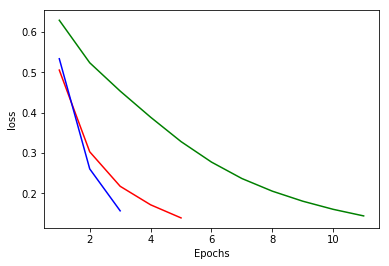

In [20]:
plotter('loss')

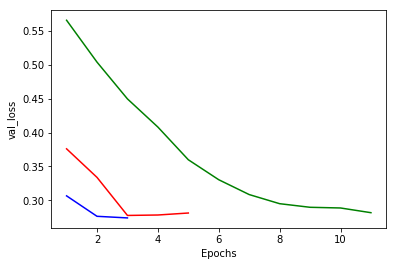

In [19]:
plotter('val_loss')

# Các model có test acc gần như bằng nhau